<a href="https://colab.research.google.com/github/femketenharkel/Predicting_Ratings/blob/main/models/clustering/DBSCAN_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Load in the data
drive.mount('/content/drive')
df_final = pd.read_csv("/content/drive/My Drive/Thesis/Data/df_final_2.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Exclude target variable and unique identifiers for clustering
df = df_final.drop(columns= ['Rating', 'MovieID', 'UserID'])

In [ ]:
# Normalize the numerical features
scaler = MinMaxScaler()
features_to_scale = ['Year', 'Month', 'Day', 'Hour', 'Age', 'Release_year',
                       'Time_release_to_rating', 'Total_ratings_per_movie',
                       'Total_ratings_per_user' ]
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [ ]:
df.head()

,Age,Year,Month,Day,Hour,Release_year,Time_release_to_rating,Total_ratings_per_movie,Total_ratings_per_user,Female,...,Favourite_Film-Noir,Favourite_Horror,Favourite_Musical,Favourite_Mystery,Favourite_Romance,Favourite_Sci-Fi,Favourite_Thriller,Favourite_War,Favourite_Western,Cluster
0,0.666667,0.0,0.363636,0.766667,0.086957,0.679012,0.317073,0.024511,0.047951,False,...,False,False,False,False,False,False,False,False,True,0
1,0.333333,0.0,0.636364,0.133333,0.652174,0.938272,0.060976,0.395390,0.102877,False,...,False,False,False,False,False,False,False,False,True,-1
2,0.166667,0.0,0.909091,0.700000,0.695652,1.000000,0.000000,0.168077,0.244115,True,...,True,False,False,False,False,False,False,False,False,-1
3,0.500000,0.0,0.636364,0.866667,0.956522,0.938272,0.060976,0.121681,0.309939,False,...,True,False,False,False,False,False,False,False,False,1
4,0.500000,0.0,0.636364,0.466667,0.782609,0.777778,0.219512,0.422235,0.361378,False,...,True,False,False,False,False,False,False,False,False,2


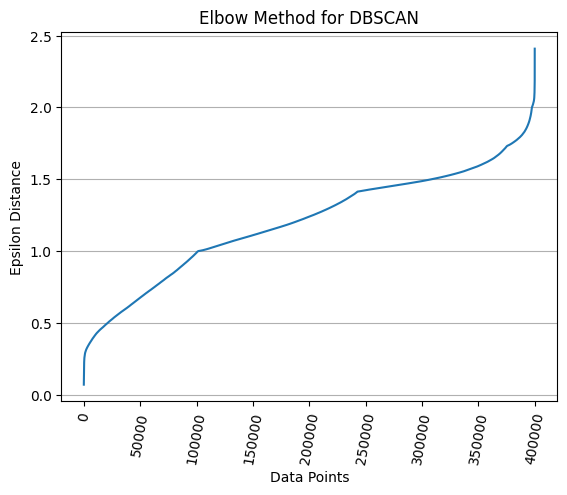

In [ ]:
# Convert the dataframe to a numpy array
X = df.to_numpy()

# Set min_samples to 69
min_samples = 69

# Compute the nearest neighbors
neighbors = NearestNeighbors(n_neighbors=min_samples)
nbrs = neighbors.fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort distances and plot
distances = np.sort(distances[:, min_samples-1], axis=0)
plt.plot(distances)
plt.title('Elbow Method for DBSCAN')
plt.xlabel('Data Points')
plt.ylabel('Epsilon Distance')

# Add horizontal grid lines
plt.grid(axis='y')
plt.xticks(rotation=80)
plt.show()


In [ ]:
# Applying DBSCAN with an estimated epsilon
epsilon = 2
dbscan = DBSCAN(eps=epsilon, min_samples=69)
clusters = dbscan.fit_predict(X)
df['Cluster'] = clusters

# Adding cluster labels to the dataframe
df_final['Cluster'] = clusters

df_final.to_csv('/content/drive/My Drive/Thesis/Data/df_final_DBSCAN_clustering_ep2.csv', index=False)

In [ ]:
# Extract the feature values
X = df.drop(columns=['Cluster']).values

# Extract the cluster labels
cluster_labels = df['Cluster'].values

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)

print(f"Silhouette Score for epsilon = 2: {silhouette_avg:.2f}")

Silhouette Score for epsilon = 2: 0.15
